```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture9-NumericalIntegration-2.pdf)
```

# High-order and Gaussian quadratures

Recall some of the standard techniques for numerical integration that we covered:

- Rectangle rule

$$
\int_{a}^b f(x) \, dx \approx (b - a) \, f\left(\frac{a+b}{2}\right)~.
$$

<!-- $$
\int_a^b f(x) \approx h \sum_{k=1}^N f(x_k), \qquad k = 1,\ldots, N
$$
with
$$
h = (b-a)/N, \qquad x_k = a + \frac{2k-1}{2} h~.
$$ -->


- Trapezoidal rule

$$
\int_{a}^b f(x) \, dx \approx (b-a) \, \frac{f(a) + f(b)}{2}~.
$$

<!-- $$
\int_a^b f(x) \, dx\approx h \sum_{k=0}^N \frac{f(x_k) + f(x_{k+1})}{2}, \qquad i = 0,\ldots, N
$$
with
$$
h = (b-a)/N, \qquad x_k = a +  k h~.
$$ -->

- Simpson's rule

$$
\int_{a}^b f(x) \, dx \approx \frac{(b-a)}{6} \, \left[f(a) + 4 f \left( \frac{a+b}{2} \right) + f(b)\right].
$$


<!-- $$
\int_a^b f(x) \approx \frac{h}{3} \left[f(x_0) + 4 \sum_{k=1}^{N/2} f(x_{2k-1}) + 2 \sum_{k=1}^{N/2-1} f(x_{2k}) + f(x_N) \right],
$$
with
$$
h = (b-a)/N, \qquad x_k = a +  k h~.
$$ -->

All these rules can be written in a form

$$
\int_a^b f(x) \, dx \approx \sum_k w_k f(x_k),
$$

i.e. the integral is approximated as a sum integrand evaluations at various points with various weights.
In particular, we have
- Rectangle rule

$$
x_k = \{(a+b)/2\}, \qquad w_k = \{(b-a)\}
$$

- Trapezoidal rule

$$
x_k = \{a,~b\}, \qquad w_k = \{(b-a)/2,~(b-a)/2\}
$$

- Simpson's rule

$$
x_k = \{a,~(a+b)/2,~b\}, \qquad w_k = \{(b-a)/6,~2(b-a)/3,~(b-a)/6\}
$$

Different numerical schemes correspond to different choices of $x_k$ and $w_k$.

The only unique constraint is that the sum of weights should be equal to

$$
\sum_k w_k = (b - a),
$$

such that the scheme gives correct result for the integration of a constant function.

## High-order quadratures

There is a systematic way to derive a numerical integration scheme

$$
\int_a^b f(x) dx \approx \sum_k w_k f(x_k),
$$

which will give an exact result when the integrand $f(x)$ is a polynomial up to a certain degree.

Let us assume that $f(x)$ can be calculated at $N+1$ points inside the integration interval $(a,b)$.
Recall that function $f(x)$ evaluated at $N+1$ distinct points can be approximated by an interpolating polynomial of order $N$:

$$
f(x) \approx p_N(x) = \sum_{k=0}^{N} f(x_k) \, L_{N,k}(x)~.
$$

Here $L_{N,k}(x)$ are the Lagrange basis functions

$$
L_{N,k}(x) = \prod_{j\neq k} \frac{x-x_j}{x_k-x_j}.
$$

The approximation $f(x) \approx p_N(x)$ becomes exact when $f(x)$ is a polynomial of degree $N$.

Integrating $p_N(x)$ gives the following numerical quadrature:

$$
\int_a^b f(x) \, dx \approx \int_a^b p_N(x) \, dx = \sum_{k = 0}^N w_k f(x_k),
$$

where

$$
w_k = \int_a^b L_{N,k}(x) dx~.
$$

**Remapping**

Note that one only really needs to calculate the quadratures (the nodes and weights) once for a single interval [typically  (-1.,1.)]. The corresponding $(-1,1)$ quadrature can always be mapped to any finite interval $(a,b)$ by the following tranformation

$$
x_k \to \frac{a+b}{2} + \frac{b-a}{2} x_k~,\\
w_k \to \frac{b-a}{2} w_k~.
$$

### Generic integration using quadratures

In [21]:
# Generic integration using quadratures
def integrate_quadrature(
    f,   # Function to be integrated 
    quad # A pair of lists (x,w) where x are the integration nodes and w are the weights 
                        ):
    ret = 0.
    n = len(quad[0])
    for k in range(n):
        xk = quad[0][k]
        wk = quad[1][k]
        ret += wk * f(xk)
    return ret

### Newton-Cotes quadrature

The simplest assumption is to take the $x_k$ to be distributed equidistantly.
This is called **Newton-Cotes quadrature**.
The integral is approximated as

$$
\int_a^b f(x) \, dx \approx \int_a^b p_N(x) \, dx = \sum_{k=0}^N w_k f(x_k),\\
w_k = \int_a^b L_{N,k}(x) dx~,
$$

but two scenarios are possible: the points $x_k$ either (a) include the endpoints $(a,b)$ or (b) exclude the endpoint.

In the case (a) we have a closed Newton-Cotes quadrature

$$
x_k = a + h k, \qquad k = 0\ldots N, \qquad h = (b-a)/N,
$$

while in case (b) we have an open Newton-Cotes quadrature

$$
x_k = a + h k, \qquad k = 1\ldots N+1, \qquad h = (b-a)/(N+2).
$$

The weights $w_k$ can be evaluated just once using e.g. one of the earlier developed methods of numerical integration, such as the Romberg method.

The Newton-Cotes quadratures give exact answer for the integration of polynomials up to degree $N$.

In [22]:
import numpy as np

# Lagrange basis functions from Lecture 2
def Lnj(x,j,xdata):
    """Lagrange basis function."""
    ret = 1.
    for k in range(0, len(xdata)):
        if (k != j):
            ret *= (x - xdata[k]) / (xdata[j] - xdata[k])
    return ret

# Romberg method from previous lecture
# to calculate the weights wk
def romberg(
    f, 
    a, 
    b, 
    accuracy=1e-8,
    max_order=16,
    min_order=2
):
    R = np.zeros((max_order, max_order))
    h = (b - a) / 2.
    R[0, 0] = h * (f(a) + f(b)) # The initial trapezoidal rule   
    for n in range(1, max_order):
        trapezoid = 0.0
        for j in range(2**(n-1)):
            trapezoid += f(a + (2*j+1)*h)
        R[n, 0] = 0.5 * R[n-1, 0] + h * trapezoid # The trapezoidal rule
        l = 1
        # The Romberg iterations
        for m in range(1, n+1):
            l *= 4
            R[n, m] = (l * R[n, m-1] - R[n-1, m-1]) / (l-1)
        # print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(n, R[n, m], abs(R[n, m] - R[n-1, m-1])))
        if abs(R[n, m] - R[n-1, m-1]) < accuracy and n > min_order:
            return R[n, m]
        h /= 2.
    print("Romberg method did not converge to required accuracy")
    return R[-1, -1]

In [23]:
# Calculating the weights using the Romberg method
# to requested accuracy for a given set of nodes x
# over the interval (a,b)
def compute_weights(x, 
                    a, 
                    b, 
                    tol = 1.e-15):
    ret = []
    for k in range(0,len(x)):
        tx = x
        def f(t):
            return Lnj(t, k, x) # Lnj is the Lagrange basis function from Lecture 2
        ret.append(romberg(f, a, b, tol))
    return ret

# Calculate the nodes and weights of either
# closed or open Newton-Cotes quadrature
# to requested accuracy
def newton_cotes(n, 
                 a = -1., 
                 b = 1., 
                 isopen = False, 
                 tol = 1.e-15):
    x = []
    if (isopen):
        h = (b - a) / (n + 2.)
        x = [a + (i+1)*h for i in range(0,n+1)]
    else:
        h = (b - a) / n
        x = [a + i*h for i in range(0,n+1)]
    return x, compute_weights(x, a, b, tol)

Open Newton-Cotes rule for N = 0 gives the rectangle rule

In [24]:
# Open Newton-Cotes rule with N = 0 gives the rectangle rule
newton_cotes(0, -1., 1., True)

([0.0], [np.float64(2.0)])

Closed Newton-Cotes rule for N = 1 gives the trapezoidal rule

In [25]:
# Closed Newton-Cotes rule with N = 1 gives the trapezoidal rule
newton_cotes(1, -1., 1., False)

([-1.0, 1.0], [np.float64(1.0), np.float64(1.0)])

Closed Newton-Cotes rule with N = 2 gives the Simpson's rule

In [26]:
# Closed Newton-Cotes rule with N = 2 gives the Simpson's rule
newton_cotes(2, -1., 1., False)

([-1.0, 0.0, 1.0],
 [np.float64(0.3333333333333333),
  np.float64(1.3333333333333333),
  np.float64(0.3333333333333333)])

In [27]:
# Visualize
import numpy as np

import matplotlib.pyplot as plt
# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

accuracy = 1.e-12

def quadrature_visualize(quad, a = -1., b = 1., title = "Quadrature"):
    n = len(quad[0])

    plt.xlabel("x")
    plt.ylabel("${w_k}$")
    plt.xlim(a,b)
    plt.title(title)
    for k in range(0,n):
        xk = quad[0][k]
        wk = quad[1][k]
        # print(xk," ",wk)
        plt.plot([xk,xk],[0.,wk], color = 'blue')
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    
    return plt

Newton-Cotes quadrature permits negative weights

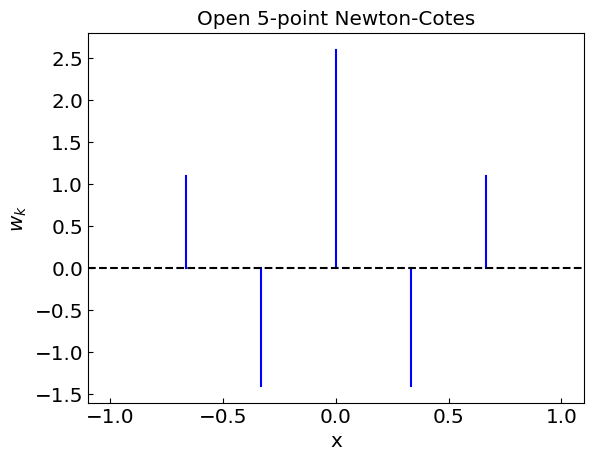

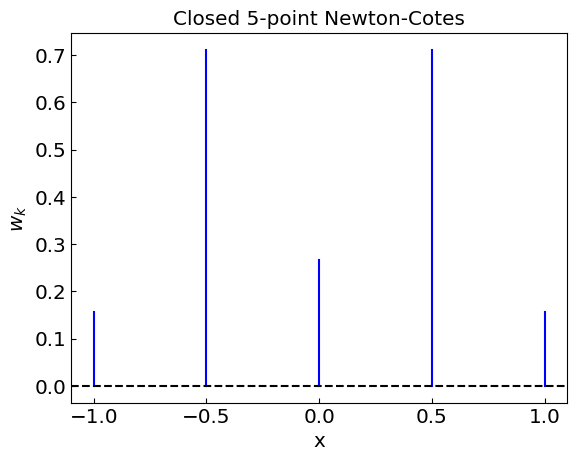

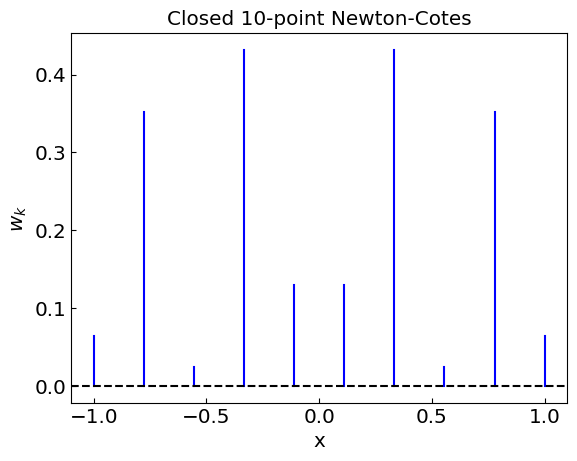

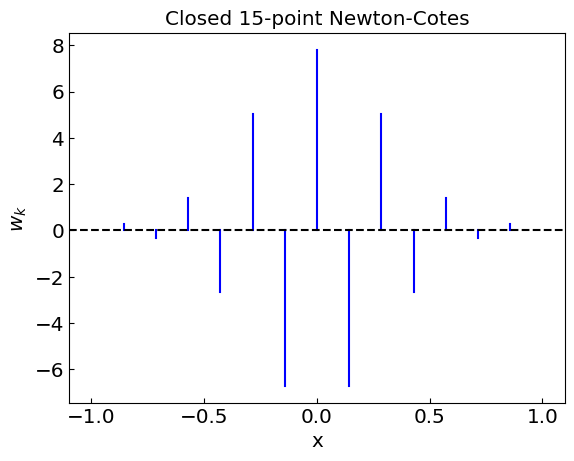

In [28]:
quadrature_visualize(newton_cotes(4, -1., 1., True), -1.1, 1.1, "Open 5-point Newton-Cotes").show()
quadrature_visualize(newton_cotes(4, -1., 1., False), -1.1, 1.1, "Closed 5-point Newton-Cotes").show()
quadrature_visualize(newton_cotes(9, -1., 1., False), -1.1, 1.1, "Closed 10-point Newton-Cotes").show()
quadrature_visualize(newton_cotes(14, -1., 1., False), -1.1, 1.1, "Closed 15-point Newton-Cotes").show()

Let us now apply Newton-Cotes quadratures to the integration of a polynomial we had before 

In [29]:
# Take our function example from last lecture
flabel = 'x^4 - 2x + 2'
def f(x):
    return x**4 - 2*x + 2
flimit_a = 0.
flimit_b = 2.

# Open Newton-Cotes integration
print("Computing the integral of",flabel, "over the interval (",flimit_a,",",flimit_b,") using open Newton-Cotes quadratures")
print("{0:>10} {1:>20}".format("N", "I_N"))
for N in range(0,8):
    quadr = newton_cotes(N, flimit_a, flimit_b, True)
    integral = integrate_quadrature(f, quadr)
    print("{0:>10} {1:>20.16f}".format(N, integral))

# Closed Newton-Cotes integration
print("Computing the integral of",flabel, "over the interval (",flimit_a,",",flimit_b,") using closed Newton-Cotes quadratures")
print("{0:>10} {1:>20}".format("N", "I_N"))
for N in range(1,8):
    quadr = newton_cotes(N, flimit_a, flimit_b, False)
    integral = integrate_quadrature(f, quadr)
    print("{0:>10} {1:>20.16f}".format(N, integral))

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using open Newton-Cotes quadratures
         N                  I_N
         0   2.0000000000000000
         1   3.3580246913580254
         2   6.1666666666666661
         3   6.2378666666666671
         4   6.4000000000000039
         5   6.3999999999999986
         6   6.4000000000000021
         7   6.4000000000000039
Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using closed Newton-Cotes quadratures
         N                  I_N
         1  16.0000000000000000
         2   6.6666666666666661
         3   6.5185185185185182
         4   6.4000000000000004
         5   6.4000000000000012
         6   6.3999999999999986
         7   6.4000000000000004


Newton-Cotes quadratures work well when the integrand is a polynomial since in this case the interpolating polynomial approximates the integrand exactly

However, issues may arise when the interpolating polynomial does not approximate the integrand well, as was in the case of the Runge function

In [30]:
rungelabel = "Runge function"
def runge(x):
    return 1./(25*x**2 + 1.)

runge_a = -1.
runge_b = 1.

# Open Newton-Cotes integration
print("Computing the integral of",rungelabel, "over the interval (",runge_a,",",runge_b,") using open Newton-Cotes quadratures")
print("{0:>10} {1:>20}".format("N", "I_N"))
for N in range(0,8):
    quadr = newton_cotes(N, runge_a, runge_b, True)
    integral = integrate_quadrature(runge, quadr)
    print("{0:>10} {1:>20.16f}".format(N, integral))

# Closed Newton-Cotes integration
print("Computing the integral of",rungelabel, "over the interval (",runge_a,",",runge_b,") using closed Newton-Cotes quadratures")
print("{0:>10} {1:>20}".format("N", "I_N"))
for N in range(1,15):
    quadr = newton_cotes(N, runge_a, runge_b, False)
    integral = integrate_quadrature(runge, quadr)
    print("{0:>10} {1:>20.16f}".format(N, integral))

Computing the integral of Runge function over the interval ( -1.0 , 1.0 ) using open Newton-Cotes quadratures
         N                  I_N
         0   2.0000000000000000
         1   0.5294117647058825
         2  -0.2988505747126436
         3   0.2666666666666667
         4   2.0404749055585549
         5   0.9320668542657328
         6  -2.0045340869981669
         7  -0.1816307907657775
Computing the integral of Runge function over the interval ( -1.0 , 1.0 ) using closed Newton-Cotes quadratures
         N                  I_N
         1   0.0769230769230769
         2   1.3589743589743588
         3   0.4162895927601810
         4   0.4748010610079575
         5   0.4615384615384615
         6   0.7740897346941600
         7   0.5797988819496757
         8   0.3000977814255821
         9   0.4797235795683667
        10   0.9346601111306989
        11   0.6489545880557170
        12  -0.0625873031506956
        13   0.3839594433665099
        14   1.5799089281703083


Integration of Runge's function using Newton-Cotes quadratures does not give an accurate answer because high oscillations at the edges of the integration. Romberg method on the other hand gives an accurate estimate

In [31]:
# Romberg method
print("Computing the integral of",rungelabel, "over the interval (",runge_a,",",runge_b,") using Romberg method")
print(romberg(runge, runge_a, runge_b))

Computing the integral of Runge function over the interval ( -1.0 , 1.0 ) using Romberg method
0.549360306777909


### Clenshaw-Curtis quadrature

Newton-Cotes method can be improved by adjusting the choice of nodes. For instance, we learned that Chebyshev nodes minimize the Runge phenomenon in polynomial interpolation. 

A quadrature based on Chebyshev nodes is called **Clenshaw-Curtis quadrature**. The weights of Clenshaw-Curtis quadrature can be efficiently computed using discrete cosine transform but for the present purposes we will using the straightforward numerical integration

In [32]:
def chebyshev_nodes(n,a,b):
    return [(a+b)/2. + (b-a) / 2. * np.cos((2.*k+1.)/(2.*n+2.)*np.pi) for k in range(n+1)]

def clenshaw_curtis(n, a = -1., b = 1., tol = 1.e-15):
    x = chebyshev_nodes(n,a,b)
    return x, compute_weights(x, a, b, tol)

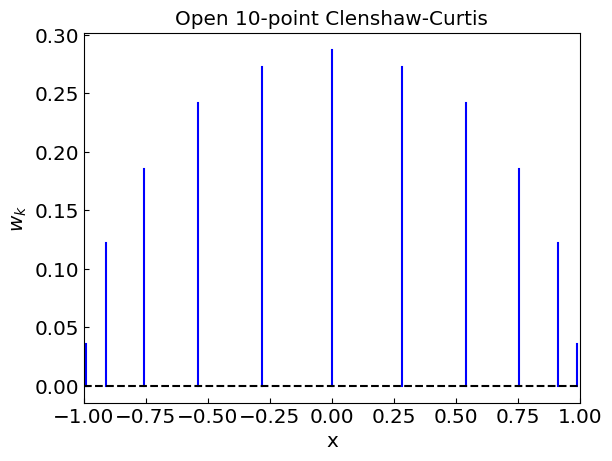

In [33]:
cc10 = clenshaw_curtis(10, -1., 1.)
quadrature_visualize(cc10, -1., 1., "Open 10-point Clenshaw-Curtis").show()

The nodes of Clenshaw-Curtis quadrature are all positive, which is not the case for the Newton-Cotes quadrature. This helps to avoid large cancellation errors in the integration.

Let us integrate the Runge function using Clenshaw-Curtis quadrature

In [34]:
# Clenshaw-Curtis integration
print("Computing the integral of",rungelabel, "over the interval (",runge_a,",",runge_b,") using closed Clenshaw-Curtis quadratures")
print("{0:>10} {1:>20}".format("N", "I_N"))
for N in range(0,25):
    quadr = clenshaw_curtis(N, runge_a, runge_b)
    integral = integrate_quadrature(runge, quadr)
    print("{0:>10} {1:>20.16f}".format(N, integral))

Computing the integral of Runge function over the interval ( -1.0 , 1.0 ) using closed Clenshaw-Curtis quadratures
         N                  I_N
         0   2.0000000000000000
         1   0.1481481481481482
         2   1.1561181434599159
         3   0.3393357342937174
         4   0.7366108212029662
         5   0.4422623071358261
         6   0.6363602552248223
         7   0.4995830749190563
         8   0.5839263513091471
         9   0.5259711610228504
        10   0.5661564732597759
        11   0.5388727075897808
        12   0.5562316021895978
        13   0.5445109449451717
        14   0.5527811219474377
        15   0.5472112438100144
        16   0.5507349751776419
        17   0.5483645031315993
        18   0.5500702958302579
        19   0.5489233775473976
        20   0.5496321498366131
        21   0.5491557069456035
        22   0.5495101923607436
        23   0.5492719294992722
        24   0.5494126772553229


The Clenshaw-Curtis quadrature does show convergence, albeit a somewhat slow one

## Gaussian quadrature

### Gauss-Legendre quadrature

It turns out that the choice of nodes $x_k$ can be improved further such that an $n$-point quadrature

$$
\int_a^b f(x) dx \approx \sum_{k=1}^n w_k f(x_k)
$$

gives an exact result for any polynomial of degree $2n - 1$.


Let us take the integration range as $(-1,1)$ [it always be rescaled back to $(a,b)$].
The derivation of the nodes $x_k$ and weights $w_k$ is a bit tedious.
The outcome is that the nodes $x_k$ correspond to the roots of the Legendre polynomial $P_n(x)$.

The nodes $x_k$ can in principle be found as roots of $P_n(x)$ using the methods we developed earlier, while the weights $w_k$ are evaluated through numerical integration of Lagrange basis functions. $P_n(x)$ can itself be evaluated through a recurrence relation

$$
(n+1) P_{n+1}(x) = (2n+1) x P_n(x) - n P_{n-1}(x),
$$

starting from $P_0(x) = 1$ and $P_1(x) = x$.

This method is not the most efficient one and prone to large round-off error starting from ($n \sim 20$) (try it!).

More efficient methods exists. These calculate the roots of $P_n(x)$ using analytic approximation for the initial guess and
 use the recursion formula directly to calculate the $P_n(x)$ at given $x$ rather than for pre-calculating the polynomial coefficients. The weights can also be shown to be equal to

$$
w_k = \frac{2}{(1-x_k^2) [P'_n(x_k)]^2}~.
$$

An efficient implementation can be found in M. Newman "Computational Physics" textbook http://www-personal.umich.edu/~mejn/cp/programs/gaussxw.py

In [35]:
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [36]:
print(gaussxw(1))
print(gaussxw(2))
print(gaussxw(3))

(array([-8.05825236e-16]), array([2.]))
(array([ 0.57735027, -0.57735027]), array([1., 1.]))
(array([ 7.74596669e-01, -8.96888137e-17, -7.74596669e-01]), array([0.55555556, 0.88888889, 0.55555556]))


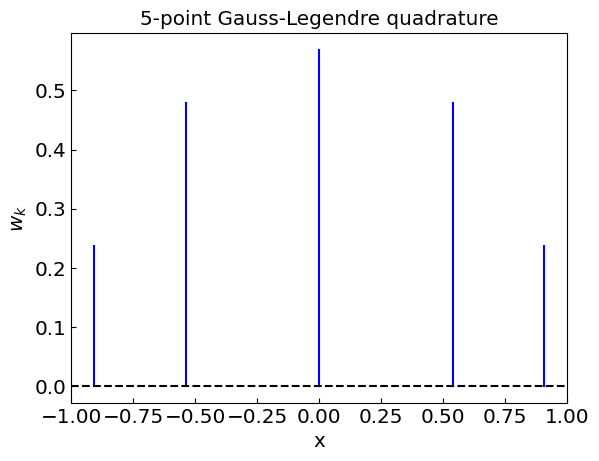

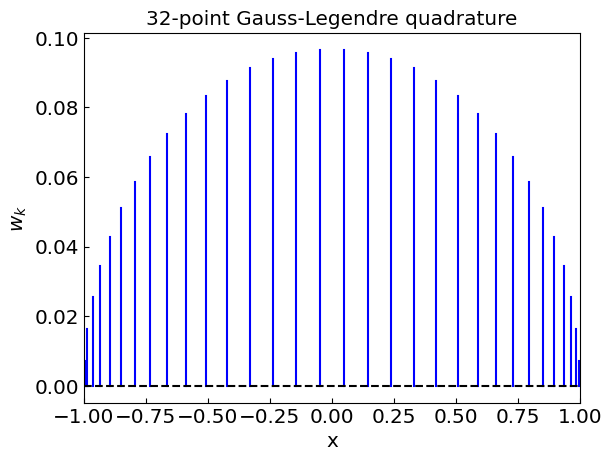

In [37]:
quadrature_visualize(gaussxw(5),  -1., 1.,  "5-point Gauss-Legendre quadrature").show()
quadrature_visualize(gaussxw(10), -1., 1., "10-point Gauss-Legendre quadrature").show()
quadrature_visualize(gaussxw(32), -1., 1., "32-point Gauss-Legendre quadrature").show()

The nodes and weights resemble the ones of the Clenshaw-Curtis quadrature.

Let us test the integration of the Runge function using the Gauss-Legendre quadrature.

In [38]:
# Gauss-Legendre quadrature integration
print("Computing the integral of",flabel, "over the interval (",flimit_a,",",flimit_b,") using Gauss-Legendre quadratures")
print("{0:>10} {1:>20}".format("N", "I_N"))
for N in range(1,8):
    quadr = gaussxwab(N, flimit_a, flimit_b)
    integral = integrate_quadrature(f, quadr)
    print("{0:>10} {1:>20.16f}".format(N, integral))

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using Gauss-Legendre quadratures
         N                  I_N
         1   1.9999999999999969
         2   6.2222222222222303
         3   6.4000000000000066
         4   6.4000000000000208
         5   6.4000000000000190
         6   6.4000000000000021
         7   6.4000000000000083


From $N = 3$ the result of integrating a quartic polynomial is exact to machine precision!

Let us try now a cubic polynomial.

In [39]:
# Another example, cubic function: trapezoidal rule vs 2-point gauss-legendre

def f2(x):
    return 7. * x**3 - 8. * x**2 - 3. * x + 3.

a = -1.
b = 1.

trapezoidal = newton_cotes(1, -1., 1., False)
clenshawcurtis = clenshaw_curtis(1, -1., 1.)
gaussn2 = gaussxwab(2, -1., 1.)

print("Computing the integral of","7x^3-8x^2-3x+3", "over the interval (",-1.,",",1.,")")
print("    Trapezoidal:", integrate_quadrature(f2, trapezoidal))
print("Clenshaw-Curtis:", integrate_quadrature(f2, clenshawcurtis))
print(" Gauss-Legendre:", integrate_quadrature(f2, gaussn2))

Computing the integral of 7x^3-8x^2-3x+3 over the interval ( -1.0 , 1.0 )
    Trapezoidal: -10.0
Clenshaw-Curtis: -2.0
 Gauss-Legendre: 0.6666666666666641


The exact result is $2/3$ and it is achieved already for $N = 2$.

```{figure} gauss_demo.png
:width: 250px
:align: center
:name: fig-gauss_demo
```

## Generalized Gaussian quadratures

The method of Gaussian quadratures can be generalized to integrals of the following type

$$
\int_a^b \omega(x) f(x) dx \approx \sum_{k=1}^n w_k f(x_k)~.
$$

Here $a$ and $b$ need not necessarily have to correspond to a finite interval, and the integration of $f(x)$ is performed with a weight function $\omega(x)$. In this case it is possible to construct an $n$-point quadrature which provides exact answer when $f(x)$ is a polynomial of degree up to $2n - 1$. The weights $w_k$ are given by

$$
w_k = \int_a^b \omega(x) \, L_{{n-1},k}(x) \, dx~.
$$

Here $x_k$ correspond to the roots of a polynomial $p_n(x)$ satisfying the relation

$$
\int_a^b \omega(x) \, x^k \, p_n(x) \, dx = 0, \qquad k = 0,\ldots,n-1~.
$$

For $a = -1$, $b = 1$, and $\omega(x) = 1$, $p_n(x)$ corresponds to $n$th Legendre polynomial as discussed before.

Other common possibilities are
- Jacobi polynomials $P_n^{(\alpha,\beta)}(x)$
    - interval $(-1,1)$
    - $\omega(x) = (1-x)^\alpha \, (1+x)^{\beta}$
- Laguerre polynomials $L_n(x)$
    - interval $[0,\infty)$
    - $\omega(x) = e^{-x}$
- Hermite polynomials $H_n(x)$
    - interval $(-\infty, \infty)$
    - $\omega(x) = e^{-x^2}$
    
For all these cases efficient methods exist for calculating the nodes $x_k$ and the weights $\omega_k$ accurately. This calculation has to be done only once.

### Gauss-Laguerre quadrature

Gauss-Laguerre quadrature is a method for numerical integration of functions of the form

$$
\int_0^\infty e^{-x} f(x) dx
$$

For $f(x)$ being a polynomial of degree up to $2n - 1$, the quadrature gives exact answer.

The nodes $x_k$ correspond to the roots of the $n$th Laguerre polynomial $L_n(x)$.
We can use **sympy** to compute the nodes and weights for $n$-point Gauss-Laguerre quadrature.


In [1]:
import sympy

# Nodes and weight for n-point Gauss-Laguerre quadrature
def laguerrexw(n):
  x = sympy.Symbol("x")
  roots = sympy.Poly(sympy.laguerre(n, x)).all_roots()
  x_i = [float(rt.evalf(20)) for rt in roots]
  w_i = [float((rt / ((n + 1) * sympy.laguerre(n + 1, rt)) ** 2).evalf(20)) for rt in roots]
  return x_i, w_i

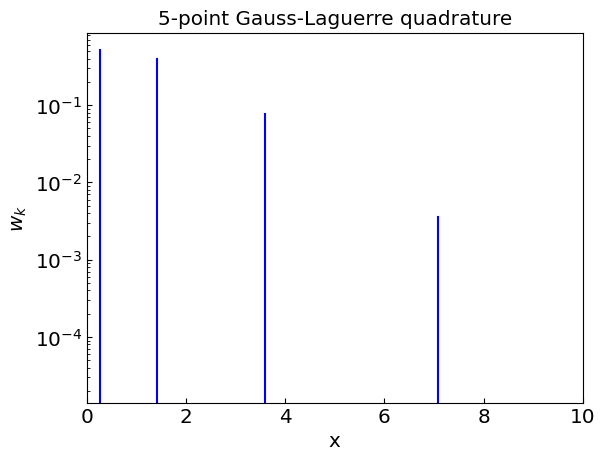

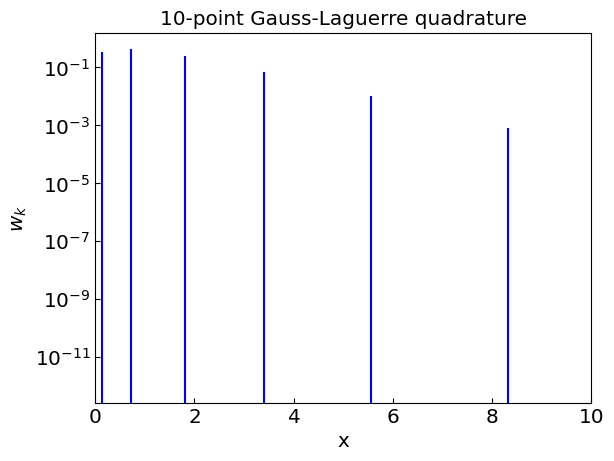

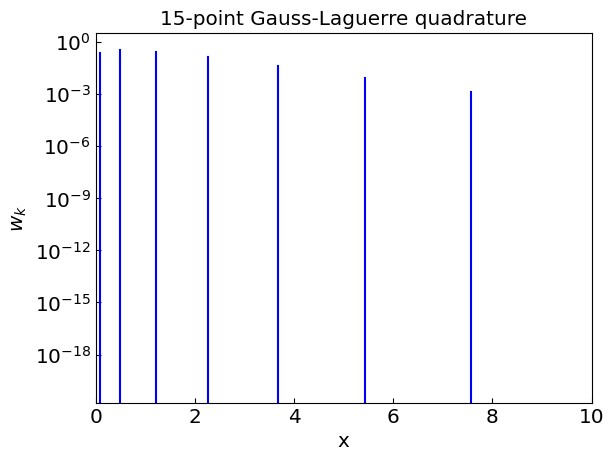

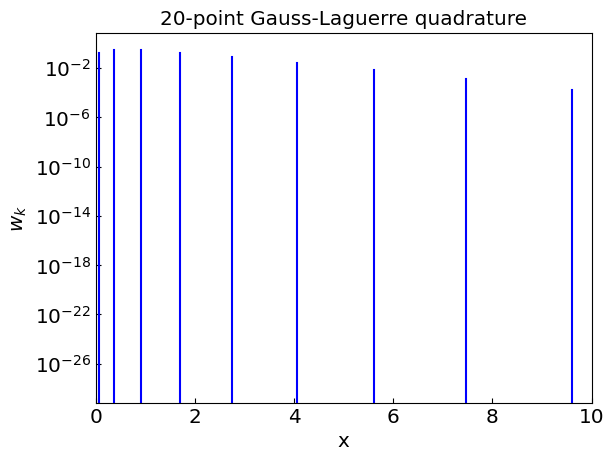

In [43]:

plt.yscale('log')
quadrature_visualize(laguerrexw(5), 0., 10., "5-point Gauss-Laguerre quadrature").show()
plt.yscale('log')
quadrature_visualize(laguerrexw(10), 0., 10., "10-point Gauss-Laguerre quadrature").show()
plt.yscale('log')
quadrature_visualize(laguerrexw(15), 0., 10., "15-point Gauss-Laguerre quadrature").show()
plt.yscale('log')
quadrature_visualize(laguerrexw(20), 0., 10., "20-point Gauss-Laguerre quadrature").show()

### Gauss-Hermite quadrature

Gauss-Hermite quadrature is a method for numerical integration of functions of the form

$$
\int_{-\infty}^\infty e^{-x^2} f(x) dx
$$

For $f(x)$ being a polynomial of degree up to $2n - 1$, the quadrature gives exact answer.

The nodes $x_k$ correspond to the roots of the $n$th Hermite polynomial $H_n(x)$.

In [44]:
import sympy as sympy
import math

# Nodes and weight for n-point Gauss-Hermite quadrature
def hermitexw(n):
    x = sympy.Symbol("x")
    roots = sympy.Poly(sympy.hermite(n, x)).all_roots()
    x_i = [float(rt.evalf(20)) for rt in roots]
    w_i = [float(2**(n-1) * math.factorial(n) * np.sqrt(np.pi) / ((n**2) * sympy.hermite(n - 1, rt)**2).evalf(20)) for rt in roots]
    return x_i, w_i

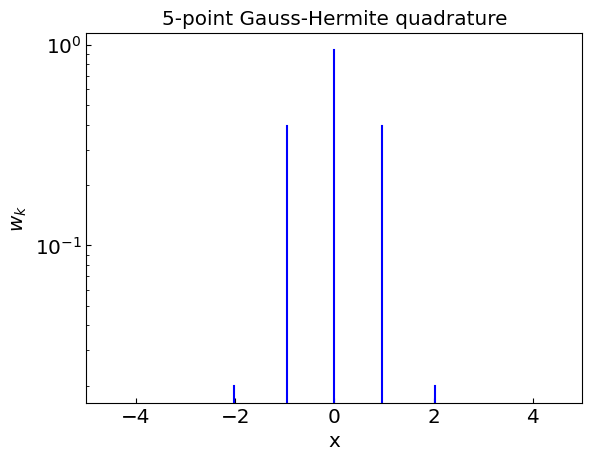

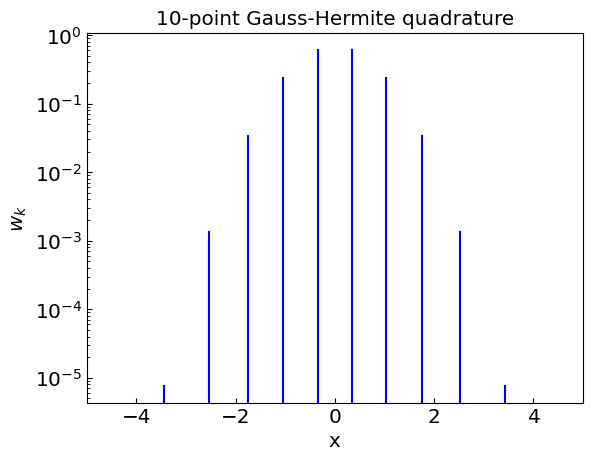

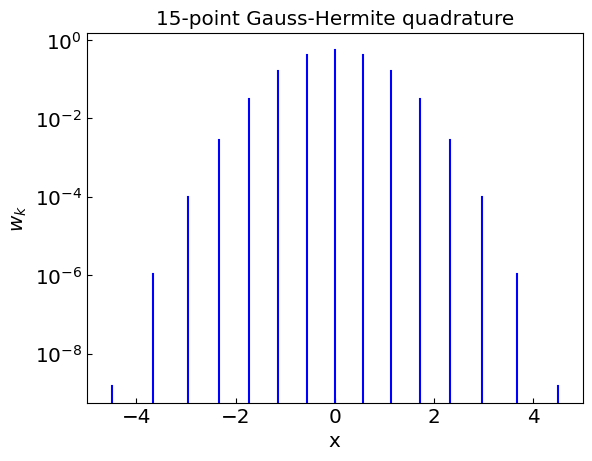

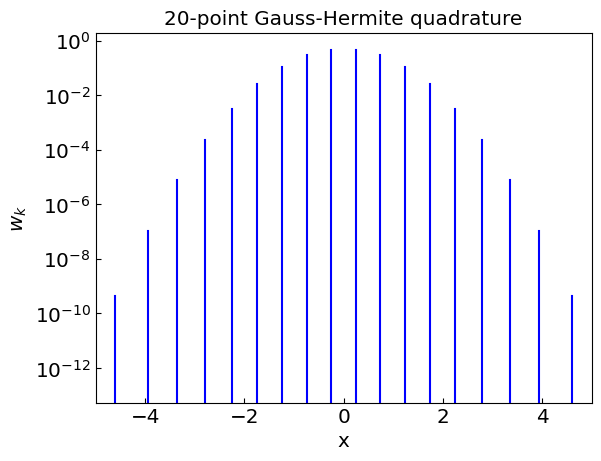

In [45]:
plt.yscale('log')
quadrature_visualize(hermitexw(5),  -5., 5., "5-point Gauss-Hermite quadrature").show()
plt.yscale('log')
quadrature_visualize(hermitexw(10), -5., 5., "10-point Gauss-Hermite quadrature").show()
plt.yscale('log')
quadrature_visualize(hermitexw(15), -5., 5., "15-point Gauss-Hermite quadrature").show()
plt.yscale('log')
quadrature_visualize(hermitexw(20), -5., 5., "20-point Gauss-Hermite quadrature").show()

### Example: Relativistic quantum distribution

Let us revisit the density of a relativistic quantum gas

$$
n = \frac{d T^3}{2\pi^2} \int_0^\infty d \tilde k \, \tilde k^2 \, \left[\exp\left\{\sqrt{\tilde m^2+\tilde k^2}-\tilde \mu \right\} + \eta \right ]^{-1},
$$

where $\tilde m = m/T$ and $\tilde \mu = \mu / T$.

This expression can be cast in a form

$$
\tilde n = n/T^3 = \int_0^\infty d x e^{-x} f(x)
$$

with

$$
f(x) = \frac{d}{2\pi^2} x^2 \, e^{x} \, \left[\exp\left\{\sqrt{\tilde m^2+x^2}-\tilde \mu \right\} + \eta \right ]^{-1}~.
$$

One can see that the function $f(x) \sim x^2$ in the limit $x \to \infty$, thus Gauss-Laguerre should be a good choice for evaluating this type of integral.

Let us do that using a 32-point Gauss-Laguerre quadrature.

In [28]:
# Precomute 32-point Gauss-Laguerre quadrature
laguerrexw32 = laguerrexw(32)

# Parameters
T = 150 # MeV
mu = 0  
m = 138 # MeV
d = 1
eta = 0

# Function for integration
def fThermal(x):
    x = float(x)
    return d * x**2 * np.exp(x) / (2 * np.pi**2) / (np.exp(np.sqrt((m/T)**2 + x**2) - mu/T) + eta)

def nIntegral(n_nodes = 32):
    quad = laguerrexw32
    if (n_nodes != 32):
        quad = laguerrexw(n_nodes)
    return integrate_quadrature(fThermal, quad)

def nT3num(inT, inMu, n_nodes = 32):
    global T, mu
    T = inT
    mu = inMu
    return nIntegral(n_nodes)

In [29]:
# Maxwell-Boltzmann

T = 150 # MeV
mu = 0
eta = 0

print("Computing Maxwell-Boltzmann integral")
print("T = ",T)
print("mu = ",mu)
print("eta = ",eta)
print("n(T,mu) = ",nT3num(150,0,32))

Computing Maxwell-Boltzmann integral
T =  150
mu =  0
eta =  0
n(T,mu) =  0.0847224926254013


In [31]:
#Bose-Einstein

T = 150 # MeV
mu = 0
eta = -1

print("Computing Bose-Einstein integral")
print("T = ",T)
print("mu = ",mu)
print("eta = ",eta)
print("n(T,mu) = ",nT3num(150,0,32))

Computing Bose-Einstein integral
T =  150
mu =  0
eta =  -1
n(T,mu) =  0.09332222578416971
